In [19]:
import numpy as np
import pandas as pd
import matplotlib
import csv
from sklearn.svm import OneClassSVM
from sklearn import svm


train_file = "train.csv"
train_data = pd.read_csv(train_file)
x_train = pd.DataFrame(train_data)

test_file = "test.csv"
test_data = pd.read_csv(test_file)
x_test = pd.DataFrame(test_data)

x_train = x_train.drop(['time', 'date', 'TooBig', 'NoRead', 'ValidDim', 'MultiRead', 'Irreg', 'TooSmall', 'Gap', 'weekday', 'velocity_units', 'belt_velocity_units'], axis=1)
x_test = x_test.drop(['time', 'date', 'TooBig', 'NoRead', 'ValidDim', 'MultiRead', 'Irreg', 'TooSmall', 'Gap', 'weekday', 'velocity_units', 'belt_velocity_units'], axis=1)


x_train = x_train.dropna(how='any')
x_test = x_test.dropna(how='any')


# print (x_test)
x_train

,height,width,length,volume,weight,angle,gap,velocity,belt_velocity,LFT
0,4.2,4.4,10.2,188.496,1.2,-30.0,18.77,2749.0,540.16,1.0
1,3.0,15.2,13.8,629.280,3.9,891.0,65.47,2786.0,538.58,1.0
2,5.2,11.6,34.2,2062.944,15.3,-26.0,58.81,2773.0,538.39,1.0
3,8.6,9.4,13.0,1050.920,3.4,-21.0,19.37,2767.0,538.19,1.0
4,5.6,8.0,15.2,680.960,1.5,-27.0,32.67,2762.0,540.55,1.0
5,10.8,15.2,23.6,3874.176,10.1,-23.0,147.36,2789.0,538.78,1.0
6,6.4,20.4,20.6,2689.536,9.4,-20.0,33.93,2778.0,538.98,1.0
7,9.6,13.0,19.2,2396.160,16.0,-4.0,0.00,2759.0,538.98,1.0
8,12.8,14.6,15.0,2803.200,23.8,-29.0,18.77,2762.0,539.17,1.0
9,15.0,15.4,20.4,4712.400,6.2,-32.0,86.69,2778.0,540.55,1.0


In [2]:
# Outlier percentage calculation
def accuracy(y_pred):
    pred = pd.DataFrame(y_pred)
    outlier_percentage = 0.0
    for item in y_pred:
        if item == -1:
            outlier_percentage += 1
    outlier_percentage /= y_pred.shape[0]
    return outlier_percentage

In [ ]:
# THIS IS OUTDATED. ATTEMPT AT OCSVM
# divide dataset into train and test halves

# iterate through each variable and run OCSVM agaisnt LFT
clf = svm.OneClassSVM(nu=0.261, kernel='rbf', gamma=0.05)
clf.fit(x_train)
y_pred= clf.predict(x_test)
print (y_pred)
clf.score(x_test)

In [3]:
# Isolation forest
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

clf = IsolationForest(max_samples=30000, random_state=10)
clf.fit(x_train)
y_pred = clf.predict(x_test)
print (y_pred)
accuracy(y_pred)

[1 1 1 ..., 1 1 1]


0.1002631143602146

In [21]:
# Local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(x_test)
print (y_pred)
accuracy(y_pred)

[ 1  1  1 ...,  1 -1  1]


0.1000031510701822

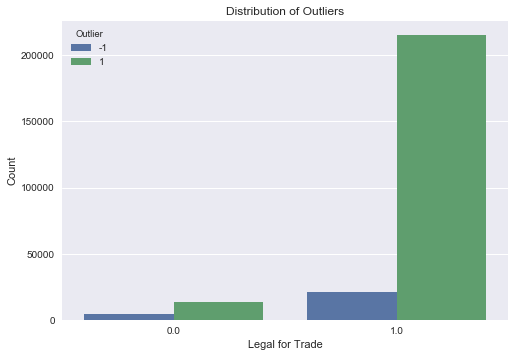

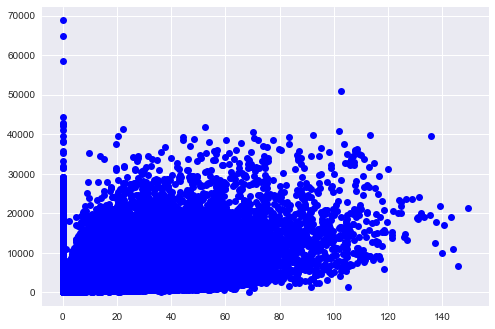

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Anomaly Detection')
pos_pred = np.array([y_pred[i] for i in range(len(y_pred)) if y_pred[i] == 1])
neg_pred = np.array([y_pred[i] for i in range(len(y_pred)) if y_pred[i] == -1])

df = x_test
df['Outlier'] = y_pred

sns.countplot('LFT',data=df,hue='Outlier')
plt.title('Distribution of Outliers')
plt.xlabel('Legal for Trade')
plt.ylabel('Count')
plt.show()

plt.figure()
plt.plot(df.weight, df.volume, 'bo')
plt.show()

# sns.boxplot('weight',data=df,hue='Outlier')
# plt.title('Distribution of Outliers')
# plt.show()

# sns.boxplot('velocity',data=df,hue='Outlier')
# plt.title('Distribution of Outliers')
# plt.show()